# Data Science for Public Good
## Zoo Station: Data Visualization
### Author: Alex Gurvich

----

# A quick primer in the power of data visualization
With slides reproduced from Professor of Psychology Steven Franconeri.

### Data visualization is a powerful tool

<img src="slides/berries.png" width="500px"> 

<img src="slides/matrices_left.png" width="500px">

<img src="slides/matrices.png" width="500px">

### How do we take advantage of it?

<img src="slides/4step.png" width="500px">

### Let's try an example.
Here's a dataset. Take a moment to look at it, what conclusions do you draw?

<img src="slides/unemployment1_abg.png" width="500px">

#### Step 1: Identify the story we want to tell.
Sometimes the same data can tell different stories. We want to focus our audience's attention. 

<img src="slides/unemployment5_abg.png" width="500px">

##### Let's pick the purple line, unemployment is higher than it was promised to be. 
So we'll change the plot title to headline that. 

<img src="slides/unemployment2.png" width="500px">

#### Step 2: Choose a visual to represent it. 

In this case our data comes to us in the form of a visualization already. So let's stick with a line graph. 

#### Step 3: Declutter & reduce to the essentials
So let's take those bullets and move them closer to the plot to draw our reader's attention to the po int we want to make. 

<img src="slides/unemployment3.png" width="500px">


#### Step 4: Highlight and annotate
Let's add some highlights to emphasize the point. The are of the curve above 8% after 2011 is the red-zone where the president went back on his promise. 

<img src="slides/unemployment4.png" width="500px">

------

# Now let's try it ourselves with some real data about the risk of job automation!

#### First we load in the different Python packages that will help us visualize our data

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from palettable.cartocolors.qualitative import Bold_6
from matplotlib.colors import get_named_colors_mapping
import copy

Duplicate key in file PosixPath('/Users/agurvich/.matplotlib/stylelib/ABG_black_presentation.mplstyle'), line 9 ('axes.edgecolor : w')


#### Open the data using `pandas`. The data is an Excel spreadsheet saved as a "comma separated values" (.csv) format. `pandas` can open this filetype with its `read_csv` function.

In [5]:
full_dataset = pd.read_csv('prob_job_automation.csv',delimiter=',')

#### Visualize the `pandas` "dataframe" as a spreadsheet. Here we can see the first 5 and last 5 rows of the spreadsheet.

In [6]:
full_dataset

,_ - rank,_ - code,prob,Average annual wage,education,occupation,short occupation,len,probability,numbEmployed,median_ann_wage,employed_may2016,average_ann_wage
0,624,51-4033,0.9500,34920.0,High school diploma or equivalent,"Grinding, Lapping, Polishing and Buffing Machi...","Tool setters, operators and tenders",35,0.9500,74600,32890.0,74600,34920.0
1,517,51-9012,0.8800,41450.0,High school diploma or equivalent,"Separating, Filtering, Clarifying, Precipitati...","Tool setters, operators and tenders",35,0.8800,47160,38360.0,47160,41450.0
2,484,41-4012,0.8500,68410.0,High school diploma or equivalent,"Sales Representatives, Wholesale and Manufactu...","Sales Representatives, Wholesale and Manufactu...",92,0.8500,1404050,57140.0,1404050,68410.0
3,105,53-1031,0.0290,59800.0,High school diploma or equivalent,First-Line Supervisors of Transportation and M...,Supervisors Transportation,26,0.0290,202760,57270.0,202760,59800.0
4,620,51-4072,0.9500,32660.0,High school diploma or equivalent,"Molding, Coremaking and Casting Machine Setter...","Molding, Coremaking and Casting Machine Setter...",89,0.9500,145560,30480.0,145560,32660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,259,27-2011,0.3700,71313.6,"Some college, no degree",Actors,Actors,6,0.3700,48620,33473.0,48620,71313.6
698,522,51-3011,0.8900,27110.0,No formal educational credential,Bakers,Bakers,6,0.8900,180450,25090.0,180450,27110.0
699,42,21-2011,0.0081,49450.0,Bachelor's degree,Clergy,Clergy,6,0.0081,49320,45740.0,49320,49450.0
700,669,41-9012,0.9800,36560.0,No formal educational credential,Models,Models,6,0.9800,4390,21870.0,4390,36560.0


##### Questions:
1. What does each row represent? How many are there?
2. What does each column represent? How many are there?
3. What's good about this visualization method? What's bad?

#### One of the most useful things to do to data is to reorder it according to some important feature. In this case, we are interested in the probability that a job will be automated. In that case, we will sort the data from most likely to be automated to least. 

In [7]:
sorted_full_dataset = full_dataset.sort_values('prob',ascending=False,inplace=False)
sorted_full_dataset

,_ - rank,_ - code,prob,Average annual wage,education,occupation,short occupation,len,probability,numbEmployed,median_ann_wage,employed_may2016,average_ann_wage
628,697,49-9064,0.9900,39720.0,High school diploma or equivalent,Watch Repairers,Watch Repairers,15,0.9900,1620,36740.0,1620,39720.0
534,692,25-4031,0.9900,34780.0,Postsecondary nondegree award,Library Technicians,Library Technicians,19,0.9900,93410,32890.0,93410,34780.0
69,694,51-9151,0.9900,31740.0,High school diploma or equivalent,Photographic Process Workers and Processing Ma...,Photographic Process Workers and Processing Ma...,61,0.9900,26430,26470.0,26430,31740.0
541,693,43-4141,0.9900,36480.0,High school diploma or equivalent,New Accounts Clerks,New Accounts Clerks,19,0.9900,41630,34990.0,41630,36480.0
209,701,23-2093,0.9900,51490.0,High school diploma or equivalent,"Title Examiners, Abstractors and Searchers","Title Examiners, Abstractors and Searchers",42,0.9900,54560,45800.0,54560,51490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,5,29-1181,0.0033,79290.0,Doctoral or professional degree,Audiologists,Audiologists,12,0.0033,12310,75980.0,12310,79290.0
148,4,21-1023,0.0031,47880.0,Bachelor's degree,Mental Health and Substance Abuse Social Workers,Mental Health and Substance Abuse Social Workers,48,0.0031,114040,42700.0,114040,47880.0
66,2,49-1011,0.0030,66730.0,High school diploma or equivalent,"First-Line Supervisors of Mechanics, Installer...","First-Line Supervisors of Mechanics, Installer...",61,0.0030,453330,63540.0,453330,66730.0
359,3,11-9161,0.0030,78060.0,Bachelor's degree,Emergency Management Directors,Emergency Management Directors,30,0.0030,9570,70500.0,9570,78060.0


##### Questions:
1. Which column is the probability in? 
1. What does a probability of 1 mean? What does a probability of 0 mean? 
1. Which column describes the name of the job?
1. Do you notice any repeated columns? Why might there be repeated columns in the dataset?
1. Which job has the *highest* probability of being automated?
1. Which job has the *lowest* probability of being automated? 
1. Do you notice a trend in the 5 jobs *most* likely to be automated? What education is required? What is the annual wage?
1. Do you notice a trend in the 5 jobs *least* likely to be automated? What education is required? What is the annual wage?

#### Now that we have some idea of what the dataset tells us let's try making a chart to answer the same questions above.

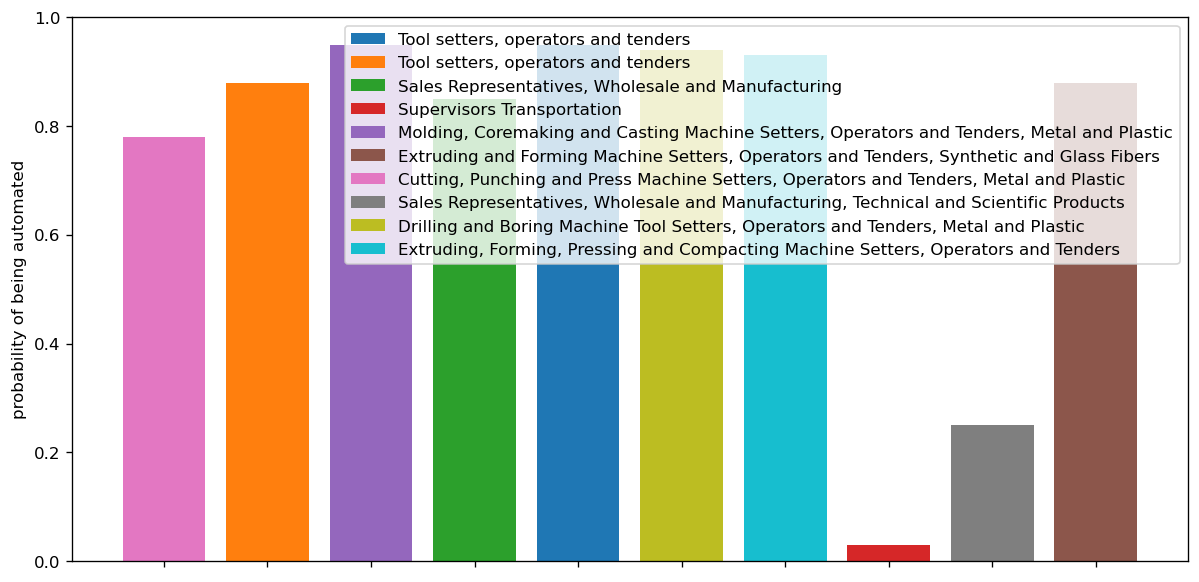

In [8]:
## make a bar chart
ys = full_dataset.iloc[:10]['prob']
xs = np.arange(len(ys)) ## x values for each bar

## make it extra hard to read the plot by mixing up the order of the bars relative to the legend
random.shuffle(xs)

## get the names for each job
xlabels = full_dataset.iloc[:10]['short occupation'].values

## plot a bar for each job
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    plt.bar(x,y,color='C%d'%i,label=label)

## set the x and y plot labels
ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels([])

ax.set_ylabel('probability of being automated')
ax.set_ylim(0,1)
ax.legend()

## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

##### Questions:
1. What's good about this chart? What's bad? 
1. Is it hard go back and forth between the legend and the bars? Is the legend in the way? 
1. What improvements would you make? 

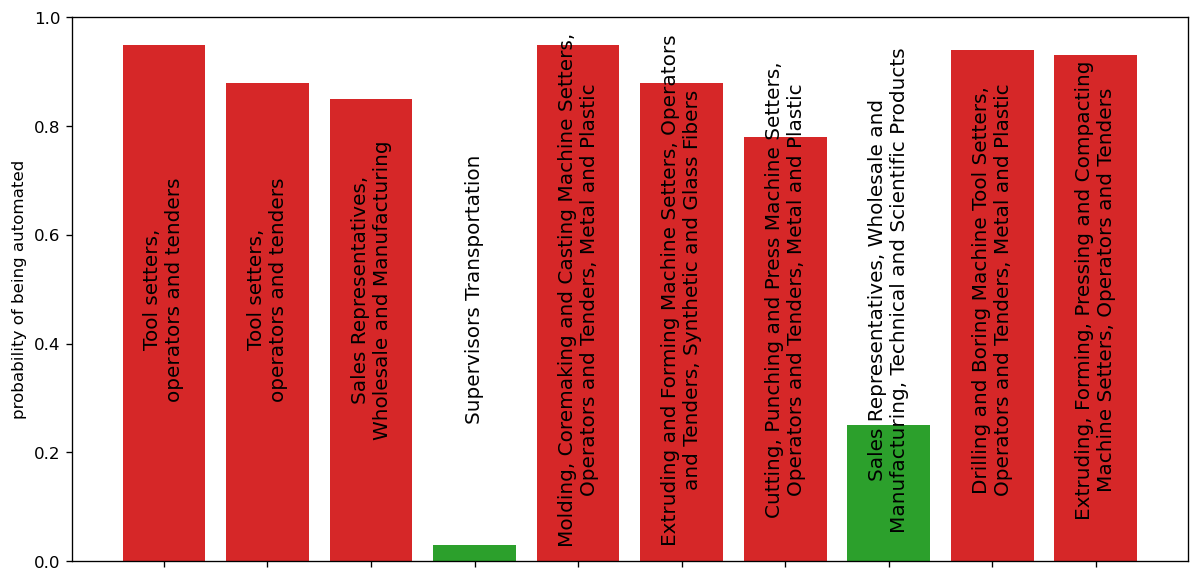

In [9]:
## make a bar chart
ys = full_dataset.iloc[:10]['prob']
xs = np.arange(len(ys)) ## x values for each bar

## get the names for each job
xlabels = full_dataset.iloc[:10]['short occupation'].values

## plot a bar for each job
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    ## highlight the bar red if it's likely to be automated
    color = 'C2' if y < 0.5 else 'C3'
    plt.bar(x,y,color=color,label=label)
        
    ## put the label on top of the bar, rather than use a legend. 
    ## if a label is too long, add a line break to the middle
    if len(label) > 30:
        label = label.split(' ')
        label = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
    plt.text(x,0.5,label,rotation=90,ha='center',va='center',color='black',fontsize=12)

# set the x and y plot labels
ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels([])

ax.set_ylabel('probability of being automated')
ax.set_ylim(0,1)

## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

##### Questions:
1. What's good about this chart? What's bad? 
1. Which bar is the tallest?
1. What improvements would you make? 

<ipython-input-12-237dccb953ff>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["%d"%ytick+"%" for ytick in ax.get_yticks()*100])


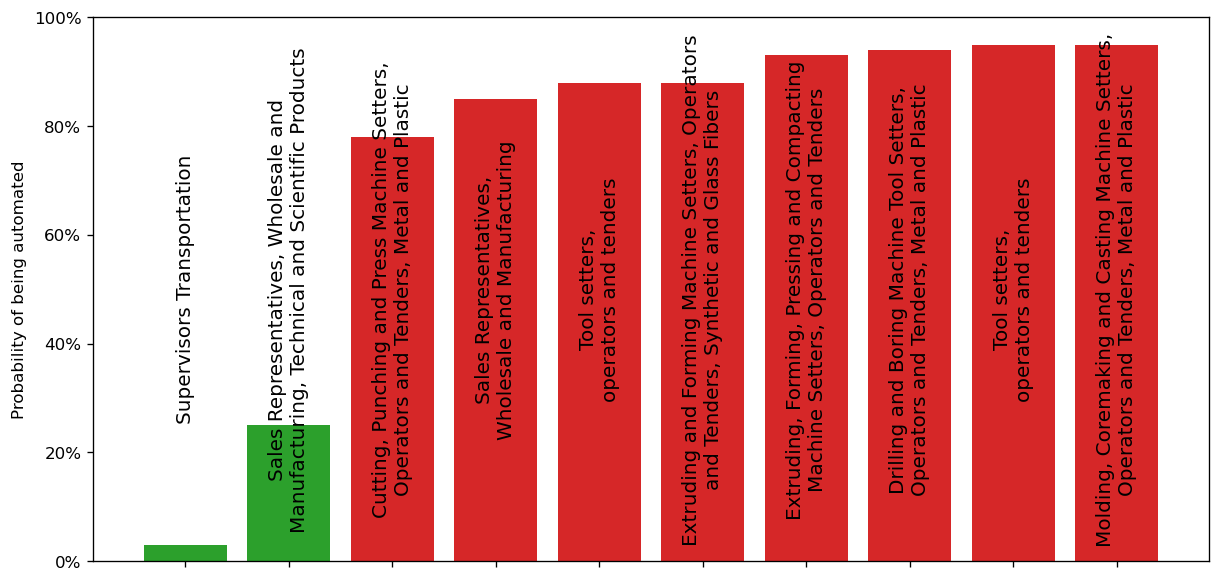

In [12]:
## make a bar chart
ys = full_dataset.iloc[:10]['prob']
xs = np.argsort(np.argsort(ys)) ## x values for each bar

## get the names for each job
xlabels = full_dataset.iloc[:10]['short occupation'].values

## plot a bar for each job
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    ## highlight the bar red if it's likely to be automated
    color = 'C2' if y < 0.5 else 'C3'
    plt.bar(x,y,color=color,label=label)
        
    ## put the label on top of the bar, rather than use a legend. 
    ## if a label is too long, add a line break to the middle
    if len(label) > 30:
        label = label.split(' ')
        label = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
    plt.text(x,0.5,label,rotation=90,ha='center',va='center',color='black',fontsize=12)

# set the x and y plot labels
ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels([])

ax.set_ylabel('Probability of being automated')
ax.set_yticklabels(["%d"%ytick+"%" for ytick in ax.get_yticks()*100])
ax.set_ylim(0,1)

## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

#### What questions can we answer with the above plot? 

* Of the (randomly chosen) 10/702 jobs shown here, Supervisors Transportation is the least likely to be automated, then Sales Representatives, Wholesale and Manufacturing, Technical and Scientific Products.

#### What does this visualization teach us about our dataset? 

* There are common key-phrases: "Tool setters," "Operators and Tenders," "Wholesale and Manufacturing," and "Metal and Plastic." Maybe these are some categories that we can break our data up into.  

### Let's break the data up into categories

In [8]:
## let's alphabetize the dataset, that will put categories 
##  that begin with the same phrases next to one another
name_sorted = full_dataset.sort_values('short occupation')

## next we'll break up each occupation by the commas in the name
occupations = name_sorted['short occupation'].values
splits = dict()

## count how many times a keyword separated by a comma appears
for occupation in occupations:
    this_split = occupation.replace(',','').split(' ')#.split(',')#
    this_split = [key[1:] if key[0] == ' ' else key for key in this_split]
    for key in this_split:
        if key in splits:
            splits[key]+=1
        else:
            splits[key] = 1

In [9]:
keys = []
jobs = []
for key in list(splits.keys()):
    if key in ['and','of']:
        splits.pop(key)
        continue
    if splits[key] > 4 and 'All Other' != key:
        keys+=[key]
        jobs += [[]]
        for occupation in occupations:
            if key in occupation:
                if 'Hand' == key and 'Handl' in occupation:
                    continue
                jobs[-1]+=[occupation]

for key in keys:
    print(key,splits[key])

Machine 42
Operators 80
Tenders 37
Administrative 5
Officers 8
Managers 27
Secondary 5
Education 10
Teachers 13
Sales 11
Agents 11
Engineering 9
Operations 5
Technicians 47
Engineers 26
Artists 5
Agricultural 6
Inspectors 6
Food 13
Science 5
Supervisors 19
Mechanics 11
Service 18
Systems 6
Assemblers 6
Specialists 16
Drivers 6
Attendants 12
Animal 6
Workers 56
Scientists 13
Directors 6
Equipment 25
Related 7
Repairers 29
Installers 16
Clerks 24
All 20
Other 27
Analysts 9
School 12
Truck 5
Technologists 8
Finishers 5
Cooks 6
Plant 6
System 5
Social 8
Investigators 5
Metal 21
Setters 26
Including 6
Industrial 7
Designers 6
Computer 12
Tool 10
Plastic 16
Information 5
Construction 7
Mining 6
Counselors 5
Hand 6
Administrators 5
Assistants 15
Laboratory 5
Oil 5
Gas 8
Medical 13
Power 5
Electrical 8
Electronics 6
Transportation 7
Home 5
Health 13
Financial 6
Fire 5
First-Line 14
Gaming 8
Materials 5
Maintenance 7
Aides 6
Mechanical 5
Physical 5
Mail 5
Therapists 7
Occupational 5


#### Questions:
1. When we split on spaces, what do you notice? Which words appear the most frequently?
2. Is there a visualization we could make? 
3. Could we split on anything else?

----

### Let's split on commas instead

In [10]:
## let's alphabetize the dataset, that will put categories 
##  that begin with the same phrases next to one another
name_sorted = full_dataset.sort_values('short occupation')

## next we'll break up each occupation by the commas in the name
occupations = name_sorted['short occupation'].values
splits = dict()

## count how many times a keyword separated by a comma appears
for occupation in occupations:
    this_split = occupation.split(',')#replace(',','').split(' ')
    this_split = [key[1:] if key[0] == ' ' else key for key in this_split]
    for key in this_split:
        if key in splits:
            splits[key]+=1
        else:
            splits[key] = 1

In [11]:
keys = []
jobs = []
for key in list(splits.keys()):
    if key in ['and','of']:
        splits.pop(key)
        continue
    if splits[key] > 4 and 'All Other' != key:
        keys+=[key]
        jobs += [[]]
        for occupation in occupations:
            if key in occupation:
                if 'Hand' == key and 'Handl' in occupation:
                    continue
                jobs[-1]+=[occupation]

for key in keys:
    print(key,splits[key])

Operators and Tenders 24
Metal and Plastic 16
Cooks 5
Hand 6


#### Questions:
1. What do we notice now? Is there a particular group that stands out?

### Let's focus on the Cooks dataset, since it is easily categorized.

In [12]:
cook_mask = ['Cooks' in occupation for occupation in full_dataset['short occupation']]
cook_dataset = full_dataset[cook_mask].sort_values('numbEmployed',ascending=False)

<ipython-input-13-fb5a175657f1>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["%d"%ytick+"%" for ytick in ax.get_yticks()*100])


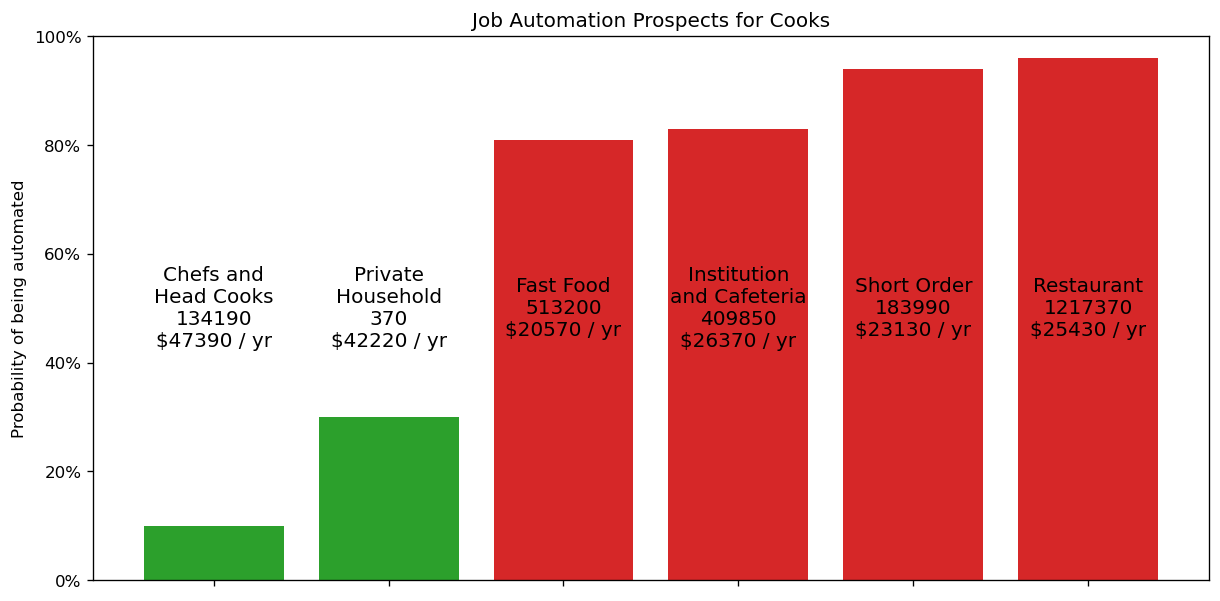

In [13]:
## make a bar chart
ys = cook_dataset['prob']
xs = np.argsort(np.argsort(ys)) ## x values for each bar

## get the names for each job
xlabels = cook_dataset.iloc[:10]['short occupation'].values

## plot a bar for each job
for i,(x,y,label) in enumerate(zip(xs,ys,xlabels)):
    ## highlight the bar red if it's likely to be automated
    color = 'C2' if y < 0.5 else 'C3'
    plt.bar(x,y,color=color,label=label)
    
    if 'Cooks, ' in label:
        label = label.split('Cooks, ')[1]
        
    ## put the label on top of the bar, rather than use a legend. 
    ## if a label is too long, add a line break to the middle    
    if len(label) > 15:
        label = label.split(' ')
        label = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):])
    
    ## add the number of cooks employed
    label += '\n%d'%cook_dataset.iloc[i]['numbEmployed']
    ## add the average annual wage
    label += '\n$%d / yr'%cook_dataset.iloc[i]['average_ann_wage']
    plt.text(x,0.5,label,rotation=0,ha='center',va='center',color='black',fontsize=12)
    
# set the x and y plot labels
ax = plt.gca()
ax.set_title('Job Automation Prospects for Cooks')

ax.set_xticks(xs)
ax.set_xticklabels([])

ax.set_ylabel('Probability of being automated')
ax.set_yticklabels(["%d"%ytick+"%" for ytick in ax.get_yticks()*100])
ax.set_ylim(0,1)

## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)

#### Questions:
1. What do we notice? Are many cooks at risk of being automated? Which kind is the most at risk?
1. Which cooks are not at risk of being automated?
1. Is there a trend in terms of how much the cooks are paid? Are higher paid cooks more likely to be automated?

In [14]:
## let's get rid of the private chefs, there's not many of them anyway
cook_dataset = cook_dataset.drop(index=445)

In [15]:
## let's pick some prettier colors
colors = np.array(Bold_6.colors)/255
colors = np.append(colors,np.ones(colors.shape[0]).reshape(-1,1),axis=1)
colors[:,-1] = 0.8

colors = colors.tolist()
colors[-1] = 'C5'

### Let's look at the data another way, what will the Cooks job sector look like before and after automation?

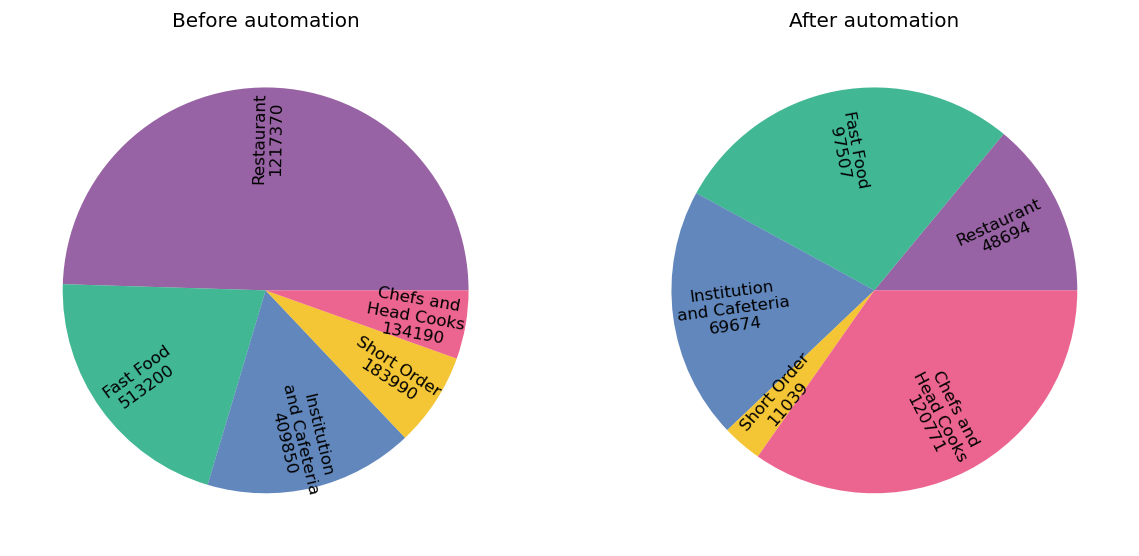

In [16]:
fig,axs = plt.subplots(nrows=1,ncols=2)

## get the job titles and line break if they're too long
xlabels = copy.copy(cook_dataset['short occupation'].values)
for i in range(len(xlabels)):
    label = xlabels[i]
    if 'Cooks, ' in label:
        xlabels[i] = label.split('Cooks, ')[1]
    label = xlabels[i]
    if len(label) > 15:
        label = label.split(' ')
        xlabels[i] = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
        
## before automation
ax = axs[0]        
ax.set_title('Before automation')

ys = cook_dataset['numbEmployed'].values
these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]

## make a pie chart
ax.pie(ys,labels=these_labels,labeldistance=0.75,rotatelabels=True,
       textprops={'verticalalignment':'center',
                  'horizontalalignment':'center'},
       colors=colors)


## after automation
ax = axs[1]
ax.set_title('After automation')

## 1-probability will be the fraction that are still employed post automation
ys = (cook_dataset['numbEmployed']*(1-cook_dataset['prob'])).values
these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]

## make a pie chart
ax.pie(ys,labels=these_labels,labeldistance=0.7,rotatelabels=True,
      textprops={'verticalalignment':'center','horizontalalignment':'center'}
      ,colors=colors)


## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)
fig.set_facecolor('white')

#### Questions:
1. What's good about this visualization? What's bad? 
1. Which sector was most affected by automation?
1. Did any sector grow? 
1. How could we make this visualization better?

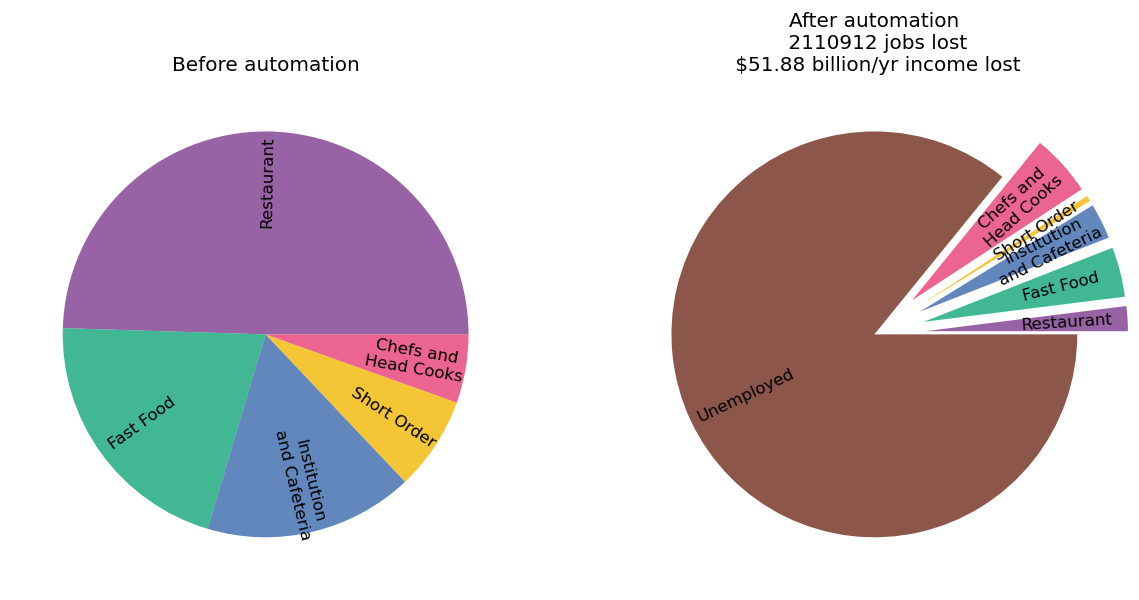

In [17]:
fig,axs = plt.subplots(nrows=1,ncols=2)

## get the job titles and line break if they're too long
xlabels = copy.copy(cook_dataset['short occupation'].values)
for i in range(len(xlabels)):
    label = xlabels[i]
    if 'Cooks, ' in label:
        xlabels[i] = label.split('Cooks, ')[1]
    label = xlabels[i]
    if len(label) > 15:
        label = label.split(' ')
        xlabels[i] = ' '.join(label[:int(len(label)/2)]) + '\n' + ' '.join(label[int(len(label)/2):]) 
        
## before automation
ax = axs[0]        
ax.set_title('Before automation')

ys = cook_dataset['numbEmployed'].values

#these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
these_labels = xlabels

## make a pie chart
ax.pie(ys,labels=these_labels,labeldistance=0.75,rotatelabels=True,
       textprops={'verticalalignment':'center',
                  'horizontalalignment':'center'},
       colors=colors)


## after automation
ax = axs[1]

## 1-probability will be the fraction that are still employed post automation
ys = (cook_dataset['numbEmployed']*(1-cook_dataset['prob'])).values

## the total - those still employed = those unemployed
fired = np.sum(cook_dataset['numbEmployed'].values) - np.sum(ys)
## tack on the fired as their own category
ys = np.append(ys,fired)

#these_labels = [label+'\n%d'%ys[i] for i,label in enumerate(xlabels)]
these_labels = xlabels.tolist()

## add the unemployed to the list of labels
these_labels.append('Unemployed')#\n%d'%fired)

## make a pie chart
ax.pie(ys,labels=these_labels,labeldistance=0.7,rotatelabels=True,explode=[0.25]*5+[0],
      textprops={'verticalalignment':'center','horizontalalignment':'center'},colors=colors)


## how much money is lost to automation?
money = np.sum(cook_dataset['average_ann_wage']*cook_dataset['numbEmployed']*cook_dataset['prob'])

## set the title with the numbers
ax.set_title('After automation\n %d jobs lost\n $%.2f billion/yr income lost'%(fired,money/1e9))

## resize figure for visibility
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.set_dpi(120)
fig.set_facecolor('white')

#### Questions:
1. What's the main point of this visualization? What draws your eye?
1. Are there any other points we can make with this visualization? Yes or no? If not, is that a bad thing? 
1. What could we add to. increase the effectiveness of the visualization? An arrow? More words?